# Closed Form vs Iterative Optimization

Normaly there are two ways to train a model. Using a "closed form" equation, i.e., a equation composed by a finite number of constants, variables and operations, there are no inifinite sums, no limits, no integrals, etc. 

On the other hand, there is the approach that consists on tweaking the models parameters to minimize a cost function over a training set. Eventually this twiking process convers to the same parameters as the first method. The iterative process is known as gradient descent (GD).

Lets going to do this with a linear regression problem.

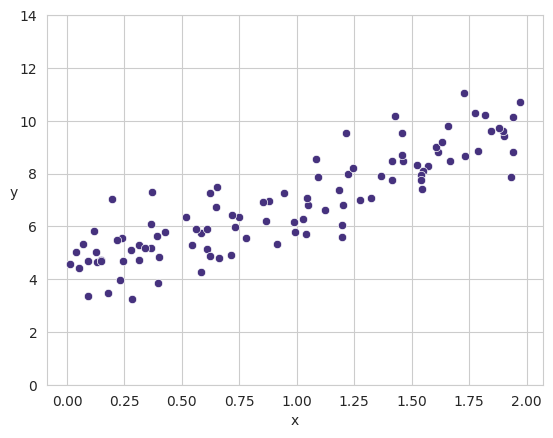

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("viridis")

np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

sns.scatterplot(x=X.ravel(), y=y.ravel())
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.ylim(0, 14)
plt.show()

## Closed Form

A linear model makes predictions by simply computing a weighted sum of the input features plus a constant called the *bias*.

$$
\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

This equation can be written much more concisely using a vectorized form.

$$
\hat{y} = h_{\theta}(x) = \theta \cdot x
$$

where:

- $h_{\theta}$ is the hypothesis function, using the model parameters $\theta$.
- $\theta$ is the model's parameters vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$.
- $x$ is the instance's features vector, containing $x_0$ to $x_n$, where $x_0$ always equals to 1.
- $\theta \cdot x$ is the dot product of the vector $\theta$ and $x$.


If $\theta$ and $x$ are column vectors then the predictions is $\hat{y} = \theta^Tx$.

Recall that training a model means setting its parameters so that the model best fits the training set. So, we need to first mesure how well or poorly the model fits the training data. To mesure how well a an algorithm is performing in training we use a function called "loss function", which generally is a different function than the one used to compute how well the algorithm is performing on predicting values, this other function is called the "objective function".

For instance, in case of a linear regression hypothesis $h_{\theta}$, we usually use the mean standard error *MSE* as a cost function, and the objective of a training a linear regression is minimize this function.

$$MSE(X, h_{\theta}) = \frac{1}{m}\sum_{i=1}^{m}{(\theta^{T}x^{(i)} - y^{(i)})^2}$$

How do we minimize a function? we can use derivates for that... What we really should care to minimize is the expression $J$, where $J(\theta) = (\theta^{T}x^{(i)} - y^{(i)})^2$. We can use the **chain rule** which is usuful when we want to derivate functions that contains other functions.

$$[f(g(x))]' = f'(g(x))*g'(x) - \text{chain rule}$$

So, the derivate of function $J$ respect to the variable $\theta$ and it looks like following:

$$\frac{\partial{}}{\partial{\theta}}J{(\theta)} = 2(\theta^{T}x^{(i)} - y^{(i)}) * (x^{(i)})
$$

Hence, the partial derivate of the cost function to respect to the hypothesis $h_{\theta}$:

\begin{array}{}
\frac{\partial{}}{\partial{\theta}}MSE(J{(\theta)}) = \frac{\partial{}}{\partial{\theta}}MSE(X, h_{\theta})
\\ \\
\frac{\partial{}}{\partial{\theta}}MSE(J{(\theta)}) = \frac{2}{m}\sum_{i=1}^{m}{(\theta^{T}x^{(i)} - y^{(i)}) * (x^{(i)})}
\end{array}

What we realy want is to find the values of $\theta$ that minimizes the cost function. We could do that again by minimizing the $J(\theta)$, where $J(\theta) = (\theta^{T}x^{(i)} - y^{(i)})$, because the other values are constants and can not be minimized. We can show the cost function as a vector.

$$
J(\theta) =
\begin{bmatrix}
\theta^T(x^0) \\
\theta^T(x^1) \\
\dots \\
\theta^T(x^m) \\
\end{bmatrix}

- y 
= X\theta - y
$$

To compute the residuals of that matrix we need to lift it to the square. And then we apply $(a + b)^2$ rule.

\begin{array}{}
J(\theta) = (X\theta - y)^T(X\theta - y)
\\ \\
J(\theta) = (X\theta)^T(X\theta) - 2y^T(X\theta) + y^Ty
\end{array}

We can express the function $J(\theta)$ as the sum of three functions. Differentiate with respect of $\theta$ of the functions $a(\theta) = (X\theta)^T(X\theta), \ b(\theta) = - 2y^T(X\theta) \ \text{and} \ c(\theta) = y^Ty$.



$$
\frac{\partial{}}{\partial{\theta}}a(\theta) = 2X^T(X\theta),
\hspace{0.25cm}
\frac{\partial{}}{\partial{\theta}}b(\theta) =  - 2X^Ty
\hspace{0.25cm}
\frac{\partial{}}{\partial{\theta}}c(\theta) = 0
$$

So, putting all togueter:

$$
\frac{\partial{}}{\partial{\theta}}J(\theta) = 2X^TX\theta - 2X^Ty = 2X^T(X\theta - y)
$$

Which for *MSE* means:

\begin{array}{}
\frac{\partial{}}{\partial{\theta}}MSE(\theta) = \frac{2}{m}X^T(X\theta - y)\\ \\
\frac{\partial{}}{\partial{\theta}}MSE(\theta) = \frac{2}{m}X^T(X\theta - y)\\
\end{array}



To find the values of the parameters that minimize the loss function, we set the gradients to zero.

\begin{array}{}
\frac{2}{m}X^TX\theta - \frac{2}{m}X^Ty = 0
\\ \\
X^TX\theta = X^Ty 
\end{array}

Assuming $X^TX$ is invertible, solve for $\theta$:

$$
\theta = (X^TX)^{-1}X^Ty
$$

### Code Example

In [7]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_bias = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_bias

array([[4.21509616],
       [2.77011339]])

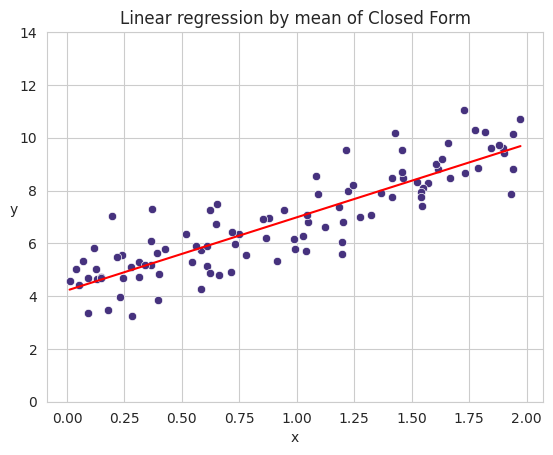

In [8]:
theta = theta_bias[1:].reshape((-1, len(X.T)))
bias = theta_bias[0]
yhat = X @ theta + bias

sns.lineplot(x=X.ravel(), y=yhat.ravel(), c="r")
sns.scatterplot(x=X.ravel(), y=y.ravel())

plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.ylim(0, 14)
plt.title("Linear regression by mean of Closed Form")
plt.show()

## Iterative Form

Instead of computing $\theta$ at once. We can do it iteratively computing the gradient vector, noted as $\nabla_{\theta}MSE(\theta)$.

$$
\nabla_{\theta}MSE(\theta) = \frac{2}{m}X^T(X\theta - y)
$$

Using the gradient vector, which points uphill of the function, we need to go in the opposite direction to go downhill of the function to find of course the minimum.
This means, substracting $\nabla_{\theta}MSE(\theta)$ from a random initialized $\theta$ and using a learning rate $\eta$ which implies the importance of the gradient vector
in each iteration.

$$
\theta^{step + 1} = \theta^{step} - \eta\nabla_{\theta}MSE(\theta)
$$

### Code Example

You can notice that it converge to the parameters learnt using the closed form.

In [9]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
eta = 0.01
n_epochs = 1000
theta_bias = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta_bias - y)
    theta_bias = theta_bias - eta * gradients

theta_bias

array([[4.15809376],
       [2.8204434 ]])

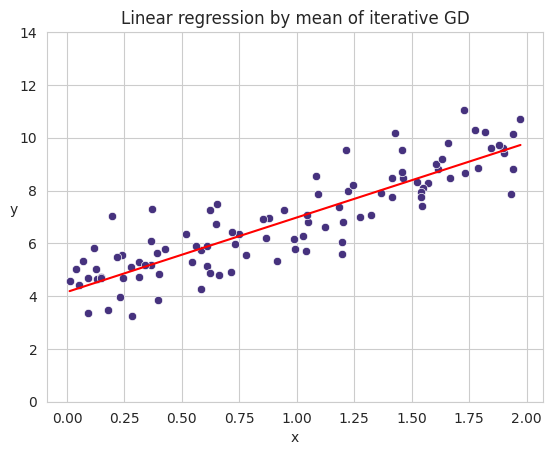

In [10]:
theta = theta_bias[1:].reshape((-1, len(X.T)))
bias = theta_bias[0]
yhat = X @ theta + bias

sns.lineplot(x=X.ravel(), y=yhat.ravel(), c="r")
sns.scatterplot(x=X.ravel(), y=y.ravel())

plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.ylim(0, 14)
plt.title("Linear regression by mean of iterative GD")
plt.show()